In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import nltk
from nltk.stem import WordNetLemmatizer
%matplotlib inline

In [142]:
df = pd.read_csv('data/espn_three_classes.csv')

In [143]:
#check for null values
df.isna().sum()

headlines      2
posted_time    0
tokens         0
labels         0
word_length    0
dtype: int64

In [144]:
df.dropna(inplace=True)

In [145]:
df.nunique()

headlines      36081
posted_time     1880
tokens         36063
labels             3
word_length       20
dtype: int64

In [146]:
df.drop_duplicates(inplace=True)

In [147]:
df['labels'].value_counts()

0    25189
1     6069
2     5280
Name: labels, dtype: int64

In [148]:
stopwords = nltk.corpus.stopwords.words('english')
wnl = WordNetLemmatizer()

In [149]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [150]:
X = df['headlines']
y = df['labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=123)

In [151]:
vectorizer = TfidfVectorizer(stop_words=stopwords)

X_train_sparse = vectorizer.fit_transform(X_train)
X_test_sparse = vectorizer.transform(X_test)

In [152]:
mnb_vanilla = MultinomialNB()
mnb_vanilla.fit(X_train_sparse, y_train)
mnb_vanilla_cv = cross_val_score(mnb_vanilla, X_train_sparse, y_train, cv=5, scoring='accuracy', n_jobs=-1)


In [153]:
def summary_scores(model, train_set_x, test_set_x, train_set_y, test_set_y, cross_val_var):
    print(f'Training Accuracy: {model.score(train_set_x, train_set_y)}')
    print(f'Cross Validation Accuracy: {np.mean(cross_val_var)}')
    print(f'Testing Accuracy: {model.score(test_set_x, test_set_y)}')
    

In [154]:
summary_scores(mnb_vanilla, X_train_sparse, X_test_sparse, y_train, y_test, mnb_vanilla_cv)

Training Accuracy: 0.9234438536127619
Cross Validation Accuracy: 0.9008835715219231
Testing Accuracy: 0.9088669950738916


In [155]:
print(classification_report(y_test, mnb_vanilla.predict(X_test_sparse)))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7557
           1       0.89      0.86      0.87      1821
           2       0.94      0.69      0.80      1584

    accuracy                           0.91     10962
   macro avg       0.91      0.84      0.87     10962
weighted avg       0.91      0.91      0.91     10962



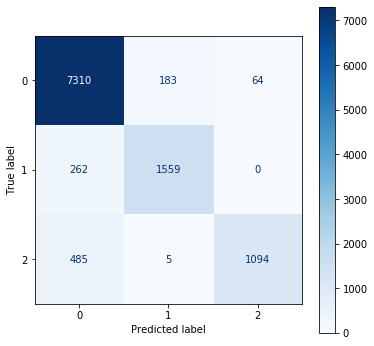

In [156]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.grid(False)
plot_confusion_matrix(mnb_vanilla, X_test_sparse, y_test, cmap='Blues', ax=ax)
plt.savefig('MultinomialNB_vanilla_conf_matrix.png')

In [56]:
mnb_vanilla_param = {'alpha':[0, 0.01, 1, 2, 10],
                     'fit_prior':[True, False]}

gs_mnb = GridSearchCV(mnb_vanilla, param_grid=mnb_vanilla_param, cv=5, n_jobs=-1)
gs_mnb.fit(X_train_sparse, y_train)
gs_mnb.best_params_

{'alpha': 10, 'fit_prior': False}

In [57]:
gs_mnb_vanilla_cv_mean = cross_val_score(gs_mnb, X_train_sparse, y_train,
                                                 cv=5, scoring='accuracy', n_jobs=-1)

In [58]:
summary_scores(gs_mnb, X_train_sparse, X_test_sparse, y_train, y_test, gs_mnb_vanilla_cv_mean)

Training Accuracy: 0.9183609634031905
Cross Validation Accuracy: 0.9081169688256878
Testing Accuracy: 0.9069512862616311


In [157]:
rf_vanilla = RandomForestClassifier()
rf_vanilla.fit(X_train_sparse, y_train)
rf_vanilla_cv = cross_val_score(rf_vanilla, X_train_sparse, y_train, cv=5, scoring='accuracy', n_jobs=-1)

In [158]:
summary_scores(rf_vanilla, X_train_sparse, X_test_sparse, y_train, y_test, rf_vanilla_cv)

Training Accuracy: 1.0
Cross Validation Accuracy: 0.9754848263206608
Testing Accuracy: 0.9773763911694946


In [159]:
print(classification_report(y_test, rf_vanilla.predict(X_test_sparse)))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      7557
           1       0.90      0.98      0.94      1821
           2       0.99      0.99      0.99      1584

    accuracy                           0.98     10962
   macro avg       0.96      0.98      0.97     10962
weighted avg       0.98      0.98      0.98     10962



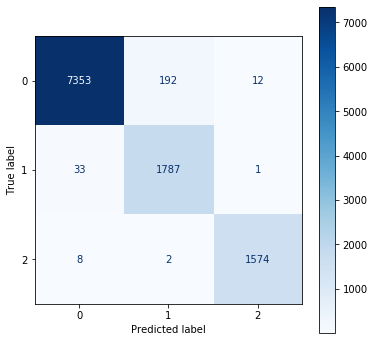

In [160]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.grid(False)
plot_confusion_matrix(rf_vanilla, X_test_sparse, y_test, cmap='Blues', ax=ax)
plt.savefig('random_forest_vanilla_conf_matrix.png')

In [161]:
vanilla_tree_depths = [estimator.get_depth() for estimator in rf_vanilla.estimators_]

In [162]:
vanilla_tree_depths

[211,
 247,
 218,
 206,
 200,
 275,
 380,
 240,
 286,
 294,
 197,
 189,
 399,
 363,
 235,
 195,
 246,
 335,
 200,
 231,
 260,
 349,
 245,
 185,
 288,
 273,
 220,
 286,
 229,
 208,
 192,
 189,
 209,
 258,
 206,
 254,
 209,
 187,
 326,
 207,
 186,
 245,
 300,
 166,
 190,
 220,
 287,
 453,
 224,
 279,
 248,
 257,
 239,
 180,
 244,
 176,
 155,
 247,
 202,
 312,
 276,
 195,
 209,
 269,
 214,
 278,
 185,
 299,
 309,
 297,
 411,
 265,
 202,
 378,
 499,
 234,
 419,
 208,
 267,
 270,
 193,
 241,
 212,
 271,
 242,
 213,
 240,
 357,
 242,
 286,
 242,
 256,
 236,
 190,
 206,
 196,
 253,
 255,
 253,
 374]

In [166]:
espn_df = pd.read_csv('data/espn_three_classes.csv')

In [167]:
grp_zero_recluster = pd.read_csv('data/espn_grp_zero_recluster.csv')

In [168]:
grp_zero_recluster.head()

,headlines,posted_time,tokens,labels,secondary_labels,kmeans_3_labels
0,Wade matches King for 42nd on scoring list in win,2016-02-01,"['wade', 'match', 'king', '42nd', 'scoring', '...",0,0,0
1,"Chick Hearn's widow, Marge Hearn, dies at 98",2016-01-31,"['chick', 'hearns', 'widow', 'marge', 'hearn',...",0,0,0
2,Wittman to miss 2 games after brother's death,2016-01-31,"['wittman', 'miss', '2', 'game', 'brother', 'd...",0,0,0
3,LeBron atones for wardrobe mismatch vs. Spurs,2016-01-31,"['lebron', 'atones', 'wardrobe', 'mismatch', '...",0,0,1
4,Source: Rockets petition to rescind Howard's t...,2016-01-31,"['source', 'rocket', 'petition', 'rescind', 'h...",0,0,0


In [169]:
grp_zero_recluster['secondary_labels'].value_counts()

0    23413
1     1808
Name: secondary_labels, dtype: int64

In [171]:
grp_zero_recluster.rename(columns={'secondary_labels':'four_labels','kmeans_3_labels':'five_labels'}, 
                          inplace=True)

In [172]:
grp_zero_recluster['four_labels'] = grp_zero_recluster['four_labels'] + 3
grp_zero_recluster['five_labels'] = grp_zero_recluster['five_labels'] + 3

In [173]:
grp_zero_recluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25221 entries, 0 to 25220
Data columns (total 6 columns):
headlines      25219 non-null object
posted_time    25221 non-null object
tokens         25221 non-null object
labels         25221 non-null int64
four_labels    25221 non-null int64
five_labels    25221 non-null int64
dtypes: int64(3), object(3)
memory usage: 1.2+ MB


In [176]:
espn_df_grp_one = espn_df.loc[espn_df['labels'] == 1]
espn_df_grp_two = espn_df.loc[espn_df['labels'] == 2]

df_grp_one['four_labels'] = espn_df_grp_one['labels']
df_grp_one['five_labels'] = espn_df_grp_one['labels']

df_grp_two['four_labels'] = espn_df_grp_two['labels']
df_grp_two['five_labels'] = espn_df_grp_two['labels']

/Users/jeremylee/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/jeremylee/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/jeremylee/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [177]:
df_grp_one.drop(columns=['word_length'], inplace=True)
df_grp_two.drop(columns=['word_length'], inplace=True)

/Users/jeremylee/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [183]:
df_relabel = pd.concat([grp_zero_recluster, df_grp_one, df_grp_two], ignore_index=True)

In [184]:
df_relabel.to_csv('espn_df_recluster.csv', index=False)

In [185]:
df_relabel.isna().sum()

headlines      2
posted_time    0
tokens         0
labels         0
four_labels    0
five_labels    0
dtype: int64

In [186]:
df_relabel.dropna(inplace=True)
df_relabel.drop_duplicates(inplace=True)

In [187]:
df_relabel['four_labels'].value_counts()

3    23382
1     6069
2     5280
4     1807
Name: four_labels, dtype: int64

In [188]:
df_relabel['five_labels'].value_counts()

3    22547
1     6069
2     5280
5     1382
4     1260
Name: five_labels, dtype: int64

In [190]:
vectorizer_four = TfidfVectorizer()
vectorizer_five = TfidfVectorizer()
X_relab = df_relabel['headlines']
y_four = df_relabel['four_labels']
y_five = df_relabel['five_labels']

In [191]:
X_train_four, X_test_four, y_train_four, y_test_four = train_test_split(X_relab, y_four, 
                                                                        test_size=0.3, stratify=y_four,
                                                                        random_state=123)

In [192]:
X_train_five, X_test_five, y_train_five, y_test_five = train_test_split(X_relab, y_five, test_size=0.3,
                                                                       stratify=y_five, random_state=123)

In [193]:
X_train_four_sparse = vectorizer_four.fit_transform(X_train_four) 
X_test_four_sparse = vectorizer_four.transform(X_test_four)
X_train_five_sparse = vectorizer_five.fit_transform(X_train_five)
X_test_five_sparse = vectorizer_five.transform(X_test_five)

In [194]:
mnb_four = MultinomialNB()
mnb_four.fit(X_train_four_sparse, y_train_four)
mnb_four_cv_mean = cross_val_score(mnb_four, X_train_four_sparse, 
                                   y_train_four, cv=5, n_jobs=-1, scoring='accuracy')

In [195]:
summary_scores(mnb_four, X_train_four_sparse, X_test_four_sparse, y_train_four, y_test_four, mnb_four_cv_mean)

Training Accuracy: 0.8897012824522991
Cross Validation Accuracy: 0.8613152840417083
Testing Accuracy: 0.8641671227878125


In [196]:
mnb_five = MultinomialNB()
mnb_five.fit(X_train_five_sparse, y_train_five)
mnb_five_cv = cross_val_score(mnb_five, X_train_five_sparse, y_train_five, cv=5, n_jobs=-1, scoring='accuracy')

In [197]:
summary_scores(mnb_five, X_train_five_sparse, X_test_five_sparse, y_train_five, y_test_five, mnb_five_cv)

Training Accuracy: 0.8567015952455427
Cross Validation Accuracy: 0.8330856752854785
Testing Accuracy: 0.8345192483123518


In [199]:
rf_four = RandomForestClassifier()
rf_four.fit(X_train_four_sparse, y_train_four)
rf_four_cv = cross_val_score(rf_four, X_train_four_sparse, y_train_four, cv=5, n_jobs=-1, scoring='accuracy')

In [200]:
summary_scores(rf_four, X_train_four_sparse, X_test_four_sparse, y_train_four, y_test_four, rf_four_cv)

Training Accuracy: 1.0
Cross Validation Accuracy: 0.9758757490922237
Testing Accuracy: 0.9741835431490604


In [201]:
rf_five = RandomForestClassifier()
rf_five.fit(X_train_five_sparse, y_train_five)
rf_five_cv = cross_val_score(rf_five, X_train_five_sparse, y_train_five, cv=5, n_jobs=-1, scoring='accuracy')

In [202]:
summary_scores(rf_five, X_train_five_sparse, X_test_five_sparse, y_train_five, y_test_five, rf_five_cv)

Training Accuracy: 1.0
Cross Validation Accuracy: 0.9754066478806068
Testing Accuracy: 0.9732713008575078


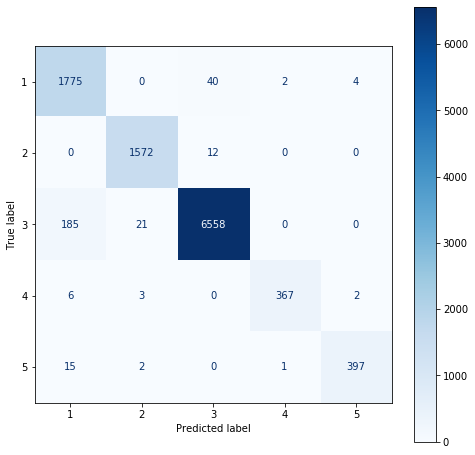

In [203]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.grid(False)
plot_confusion_matrix(rf_five, X_test_five_sparse, y_test_five, cmap='Blues', ax=ax)
plt.savefig('random_forest_five_classes_conf_matrix.png')

In [204]:
print(classification_report(y_test_five, rf_five.predict(X_test_five_sparse)))

              precision    recall  f1-score   support

           1       0.90      0.97      0.93      1821
           2       0.98      0.99      0.99      1584
           3       0.99      0.97      0.98      6764
           4       0.99      0.97      0.98       378
           5       0.99      0.96      0.97       415

    accuracy                           0.97     10962
   macro avg       0.97      0.97      0.97     10962
weighted avg       0.97      0.97      0.97     10962

